In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("data.csv")

In [3]:
#Preprocessing
X.drop("country", axis=1, inplace=True)
X = X.astype(float)

In [4]:
# Normalizing the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Outlier removal based on Z-score
X = X[(X.abs() <= 3).all(axis=1)]

In [5]:
# Convert to NumPy array
X_array = X.to_numpy()

In [6]:
#K-means
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:  # Handle empty cluster
            new_centroids.append(X[np.random.choice(X.shape[0])])
        else:
            new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)

def kmeans(X, k, max_iters=100, tolerance=1e-10):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            print(f"Converged in {i} iterations.")
            break
        centroids = new_centroids
    return labels, centroids

Converged in 1 iterations.
Converged in 2 iterations.
Converged in 13 iterations.
Converged in 6 iterations.
Converged in 20 iterations.
Converged in 11 iterations.
Converged in 18 iterations.
Converged in 10 iterations.
Converged in 7 iterations.


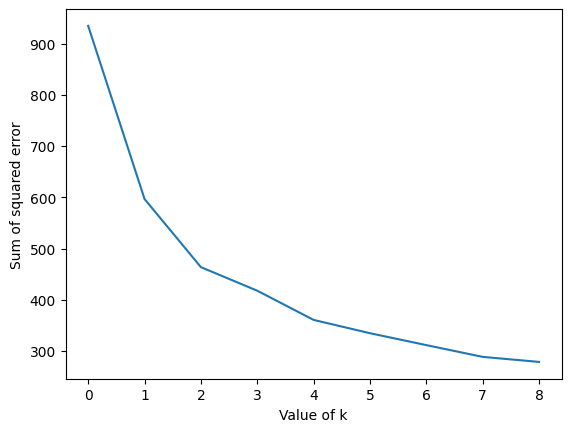

In [7]:
#Elbow Graph
def compute_inertia(X, labels, centroids):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

sse = []
for k in range(1,10):
    labels, centroids = kmeans(X_array, k)
    sse.append(compute_inertia(X_array,labels,centroids))

plt.plot(range(0,9),sse)
plt.xlabel("Value of k")
plt.ylabel("Sum of squared error")
plt.show()

Converged in 4 iterations.


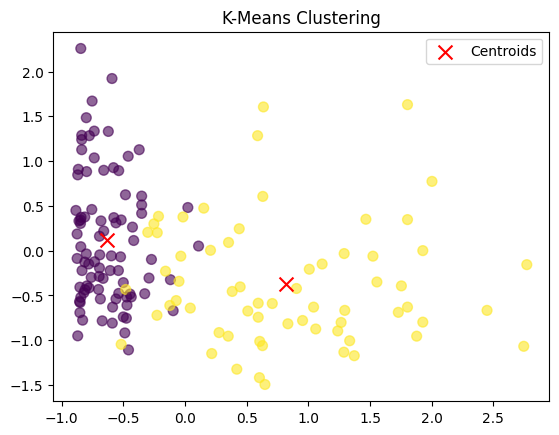

In [8]:
# Run K-Means
k = 2
labels, centroids = kmeans(X_array, k)

# Plot the results
plt.scatter(X_array[:, 0], X_array[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.legend()
plt.title("K-Means Clustering")
plt.show()

In [9]:
#Matrix
def compute_dunn_index(X, labels, centroids):
    unique_labels = np.unique(labels)
    
    intra_cluster_distances = []
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            distances = np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2)
            intra_cluster_distances.append(np.max(distances))
        else:
            intra_cluster_distances.append(0)  # No intra-cluster distance for single-point clusters

    max_intra_cluster_distance = max(intra_cluster_distances)
    
    inter_cluster_distances = []
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            distances = np.linalg.norm(cluster_i[:, np.newaxis] - cluster_j, axis=2)
            inter_cluster_distances.append(np.min(distances))

    min_inter_cluster_distance = min(inter_cluster_distances)

    if max_intra_cluster_distance > 0:
        dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    else:
        dunn_index = np.inf  # Avoid division by zero

    return dunn_index

def silhouette_score_optimized(X, labels):
    unique_labels = np.unique(labels)
    n_samples = X.shape[0]
    silhouette_scores = []

    for i in range(n_samples):
        same_cluster = X[labels == labels[i]]
        a_i = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))

        b_i = np.inf
        for label in unique_labels:
            if label != labels[i]:
                other_cluster = X[labels == label]
                b_i = min(b_i, np.mean(np.linalg.norm(other_cluster - X[i], axis=1)))

        silhouette_scores.append((b_i - a_i) / max(a_i, b_i))

    return np.mean(silhouette_scores)


inertia = compute_inertia(X_array, labels, centroids)
dunn_index = compute_dunn_index(X_array, labels, centroids)
sil_score = silhouette_score_optimized(X_array, labels)

print(f"Inertia: {inertia:.4f}")
print(f"Dunn Index: {dunn_index:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")

Inertia: 596.3716
Dunn Index: 0.1184
Silhouette Score: 0.3205


Converged in 1 iterations.
Converged in 9 iterations.
Converged in 17 iterations.
Converged in 13 iterations.
Converged in 19 iterations.
Converged in 7 iterations.
Converged in 7 iterations.
Converged in 8 iterations.
Converged in 7 iterations.


C:\Users\Dishita\AppData\Local\Temp\ipykernel_15880\2850080492.py:48: RuntimeWarning: invalid value encountered in scalar divide
  silhouette_scores.append((b_i - a_i) / max(a_i, b_i))


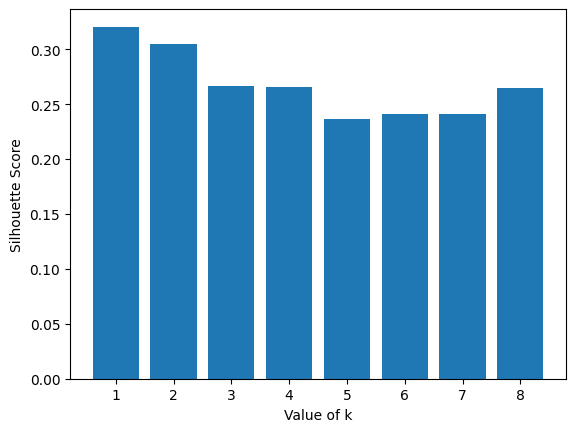

In [10]:
#Silhouette Scores for different values of k
sil = []
for k in range(1,10):
    labels, centroids = kmeans(X_array, k)
    sil.append(silhouette_score_optimized(X_array, labels))

plt.bar(range(0,9),sil)
plt.xlabel("Value of k")
plt.ylabel("Silhouette Score")
plt.show()

In [11]:
y = labels

In [12]:
#Train Test Split
ratio = 0.8

rows = X_array.shape[0]
train_size = int(ratio*rows)

X_train = X_array[0:train_size]
X_test = X_array[train_size:]

y_train = y[0:train_size]
y_test = y[train_size:]

In [13]:
from collections import Counter
from math import sqrt

def euclidean_distance(point1, point2):
    return sqrt(np.sum((point1 - point2) ** 2))

class KNN:
    def __init__(self, k=2):
        self.k = k 

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
        
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [14]:
knn = KNN(k=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print("-----")
print(y_test)

[3 3 3 8 8 3 4 1 8 0 8 4 1 5 3 0 5 8 8 2 8 5 3 3 4 2 1 8 8 0 5]
-----
[3 3 3 6 0 3 4 1 8 0 2 4 0 0 3 0 5 8 2 2 8 5 2 3 4 2 1 8 3 0 5]


In [15]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred, positive_class):
    tp = np.sum((y_pred == positive_class) & (y_true == positive_class))
    fp = np.sum((y_pred == positive_class) & (y_true != positive_class))
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(y_true, y_pred, positive_class):
    tp = np.sum((y_pred == positive_class) & (y_true == positive_class))
    fn = np.sum((y_pred != positive_class) & (y_true == positive_class))
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred, positive_class=1)
rec = recall(y_test, y_pred, positive_class=1)
f1 = f1_score(prec, rec)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7419
Precision: 0.6667
Recall: 1.0000
F1 Score: 0.8000
